In [1]:
from subprocess import call
import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from shutil import copyfile, move, copy, copytree, rmtree
from distutils.dir_util import copy_tree
from IPython.display import clear_output
from tempfile import mkstemp
from os import fdopen, remove
from sklearn import metrics
import plotly
from ema_workbench import (RealParameter, IntegerParameter, BooleanParameter, ScalarOutcome, ArrayOutcome, Constant, Model, MultiprocessingEvaluator, Policy, perform_experiments, ema_logging )
from ema_workbench import (save_results, load_results, experiments_to_scenarios)
from ema_workbench.em_framework import (sample_uncertainties)

from functools import partial
from multiprocessing import Pool, Lock
import seaborn as sns
%matplotlib inline
import plotly.express as px

import matplotlib.pyplot as plt
from scipy import stats

from numpy.lib import recfunctions as rf

#import ema_workbench.analysis.cart as cart
#from ema_workbench import ema_logging, load_results
#from ema_workbench.analysis import (cart, RuleInductionType)

ema_logging.log_to_stderr(level=ema_logging.INFO)

import io
import math
from io import StringIO

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from sklearn import tree


from ema_workbench.util.ema_exceptions import EMAError
from pygments.unistring import cats

import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import squareform
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from scipy.spatial.distance import squareform
from sklearn.cluster import KMeans
from sklearn.manifold import MDS
from sklearn import metrics

import os

In [2]:
df = pd.read_csv(r'C:\Users\teres\Documents\MasterThesis\Final_Run_EMA\Model_2015_2050\kappa_2000.csv')

In [3]:
df.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999
0,0,1.000000,0.945943,0.940829,0.940768,0.945914,0.938394,0.939565,0.940379,0.944670,...,0.936431,0.942675,0.944665,0.943154,0.939039,0.938092,0.940712,0.947192,0.948316,0.936765
1,1,0.945943,1.000000,0.942197,0.942996,0.943883,0.944958,0.942265,0.943190,0.943839,...,0.938278,0.943128,0.944666,0.943121,0.941274,0.942671,0.943259,0.945813,0.945397,0.938231
2,2,0.940829,0.942197,1.000000,0.943161,0.941988,0.941363,0.944394,0.941697,0.942908,...,0.937805,0.947268,0.941786,0.941566,0.941842,0.938945,0.944923,0.939701,0.939764,0.943820
3,3,0.940768,0.942996,0.943161,1.000000,0.936974,0.942453,0.941211,0.945243,0.939268,...,0.933727,0.943447,0.937043,0.938501,0.946927,0.939959,0.941386,0.941151,0.940514,0.945181
4,4,0.945914,0.943883,0.941988,0.936974,1.000000,0.940053,0.941051,0.939283,0.945947,...,0.941204,0.943744,0.947731,0.945319,0.936549,0.939695,0.944285,0.945528,0.944342,0.936905


In [4]:
df = df.drop(['Unnamed: 0'], axis=1)
kappa_df = df

In [5]:
distance =  1 - df

<AxesSubplot:>

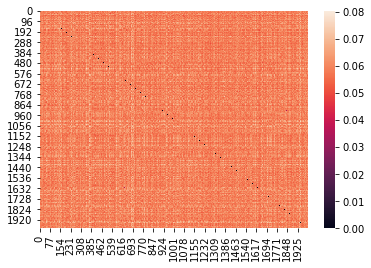

In [6]:
sns.heatmap(distance)

### Determine the clustering algorithms and the number of clusters

#### Agglomerative Clustering

In [6]:
def within_dissimilarity(df, clustering):
    clusters = np.unique(clustering.labels_)
    
    all_wk = []
    
    for cluster in clusters:
        slicer = clustering.labels_==cluster
        df_sliced = df.iloc[slicer, slicer]
        wk = np.mean(np.mean(df_sliced))
        
        all_wk.append(wk)
        
    mean_wk = np.mean(all_wk)
    
    return mean_wk

def between_dissimilarity(df, clustering):
    clusters = np.unique(clustering.labels_)
    
    all_wk = []
    
    for cluster in clusters:
        slicer = clustering.labels_==cluster
        slicer_ = clustering.labels_!=cluster
        df_sliced = df.iloc[slicer, slicer_]
        wk = np.median(np.median(df_sliced))
        
        all_wk.append(wk)
        
    mean_wk = np.median(all_wk)
    
    return mean_wk

Test the linkage methoods and the number of clusters

In [23]:
all_wk_complete = {}
all_wk_average = {}
all_wk_complete_d = {}
all_wk_average_d = {}

for i in range(10):
    clustering = AgglomerativeClustering(n_clusters=i+2, affinity='precomputed', linkage='complete').fit(distance)
    labels = clustering.labels_
    wk = within_dissimilarity(distance, clustering)
    all_wk_complete[i+2] = wk
    
    clustering = AgglomerativeClustering(n_clusters=i+2, affinity='precomputed', linkage='average').fit(distance)
    labels = clustering.labels_
    wk = within_dissimilarity(distance, clustering)
    all_wk_average[i+2] = wk
    
    if i>0:
        all_wk_complete_d[i+2] = all_wk_complete[i+1] - all_wk_complete[i+2]
        all_wk_average_d[i+2] = all_wk_average[i+1] - all_wk_average[i+2]
    else:
        all_wk_complete_d[i+2] = 0
        all_wk_average_d[i+2] = 0

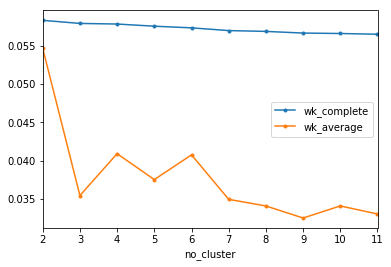

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

wk_df = pd.DataFrame()
wk_df['no_cluster'] = all_wk_complete.keys()
wk_df['wk_complete'] = all_wk_complete.values()
wk_df['wk_average'] = all_wk_average.values()

wk_df.plot(x='no_cluster', y=['wk_complete', 'wk_average'], style='.-')

#### Multi Dimensional Scaling + Agglomerative clustering

no MDS


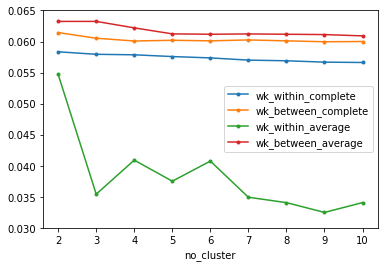

MDS to 2 components


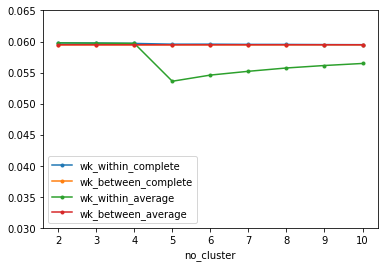

MDS to 3 components


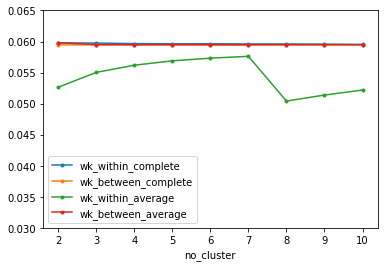

MDS to 4 components


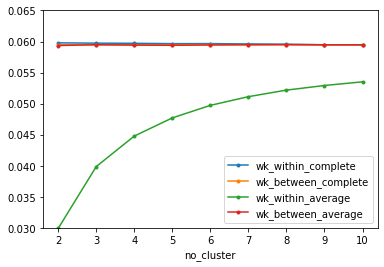

MDS to 5 components


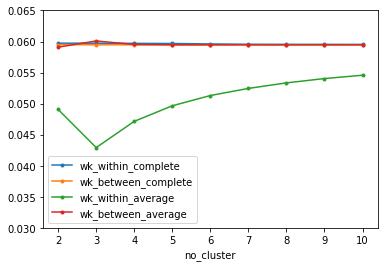

MDS to 6 components


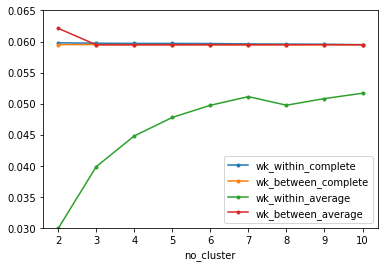

MDS to 7 components


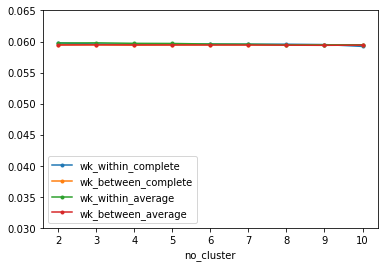

MDS to 8 components


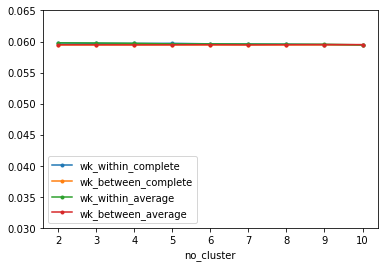

MDS to 9 components


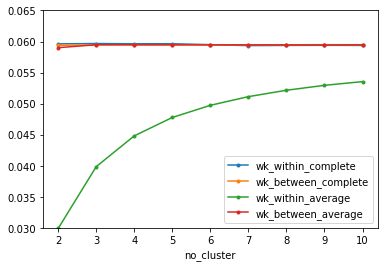

MDS to 10 components


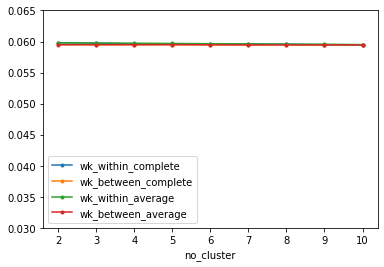

MDS to 11 components


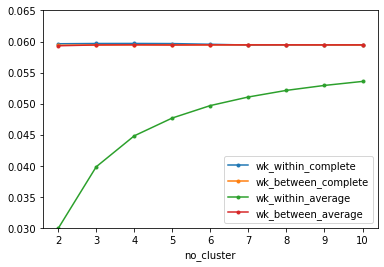

In [177]:
all_within_complete = {}
all_within_average = {}
all_between_complete = {}
all_between_average = {}

print('no MDS')

for i in range(9):
    clustering = AgglomerativeClustering(n_clusters=i+2, affinity='precomputed', linkage='complete').fit(distance)
    labels = clustering.labels_
    wk0 = within_dissimilarity(distance,clustering)
    wk0_ = between_dissimilarity(distance,clustering)
    all_within_complete[i+2] = wk0
    all_between_complete[i+2] = wk0_

    clustering = AgglomerativeClustering(n_clusters=i+2, affinity='precomputed', linkage='average').fit(distance)
    labels = clustering.labels_
    wk01 = within_dissimilarity(distance,clustering)
    wk01_ = between_dissimilarity(distance,clustering)
    all_within_average[i+2] = wk01
    all_between_average[i+2] = wk01_

wk_df = pd.DataFrame()
wk_df['no_cluster'] = all_within_complete.keys()
wk_df['wk_within_complete'] = all_within_complete.values()
wk_df['wk_between_complete'] = all_between_complete.values()
wk_df['wk_within_average'] = all_within_average.values()
wk_df['wk_between_average'] = all_between_average.values()

wk_df.plot(x='no_cluster', y=['wk_within_complete', 'wk_between_complete',
                             'wk_within_average','wk_between_average'], style='.-')
plt.ylim((0.030, 0.065))
plt.show()


for n in range(10):
    ncom = n+2
    print('MDS to '+ str(ncom) + ' components')
    model = MDS(n_components=ncom, dissimilarity='precomputed', random_state=1, metric=False)
    out = model.fit_transform(distance)
    
    all_within_complete_1 = {}
    all_within_average_1 = {}
    all_between_complete_1 = {}
    all_between_average_1 = {}
    
    for i in range(9):
        clustering = AgglomerativeClustering(n_clusters=i+2, affinity='euclidean', linkage='complete').fit(out)
        labels = clustering.labels_
        wk = within_dissimilarity(distance,clustering)
        wk1 = between_dissimilarity(distance,clustering)
        all_within_complete_1[i+2] = wk
        all_between_complete_1[i+2] = wk1

        clustering = AgglomerativeClustering(n_clusters=i+2, affinity='euclidean', linkage='average').fit(out)
        labels = clustering.labels_
        wk_ = within_dissimilarity(distance,clustering)
        wk1_ = between_dissimilarity(distance,clustering)
        all_within_average_1[i+2] = wk_
        all_between_average_1[i+2] = wk1_

    wk_df = pd.DataFrame()
    wk_df['no_cluster'] = all_within_complete_1.keys()
    wk_df['wk_within_complete'] = all_within_complete_1.values()
    wk_df['wk_between_complete'] = all_between_complete_1.values()
    wk_df['wk_within_average'] = all_within_average_1.values()
    wk_df['wk_between_average'] = all_between_average_1.values()

    wk_df.plot(x='no_cluster', y=['wk_within_complete', 'wk_between_complete',
                             'wk_within_average','wk_between_average'], style='.-')
    plt.ylim((0.030, 0.065))
    plt.show()

#### K-Means + MDS

MDS to 2 components


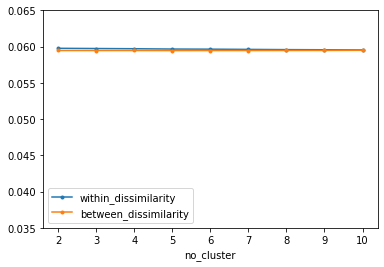

MDS to 3 components


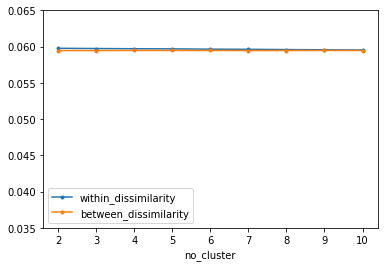

MDS to 4 components


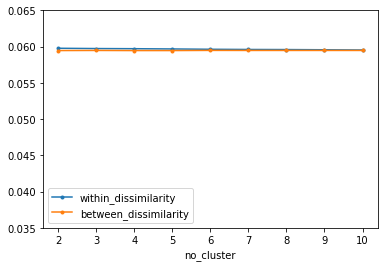

MDS to 5 components


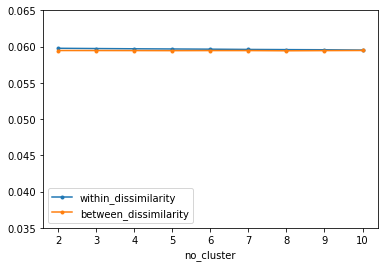

MDS to 6 components


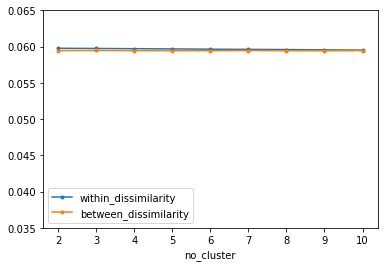

MDS to 7 components


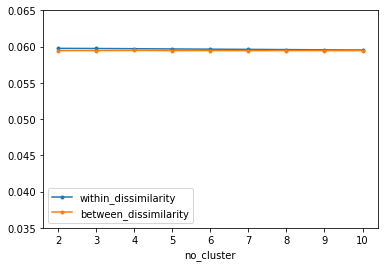

MDS to 8 components


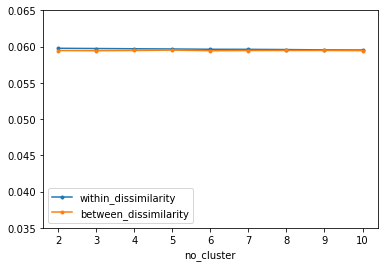

MDS to 9 components


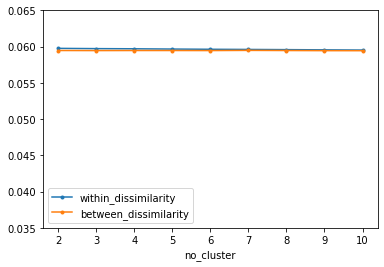

MDS to 10 components


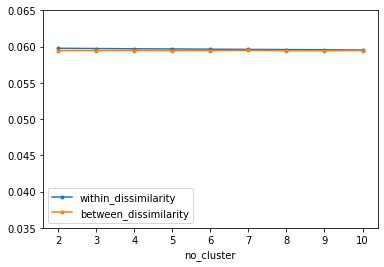

In [158]:
#all_wk_complete = {}
#all_wk_average = {}

for n in range(9):
    ncom = n+2
    print('MDS to '+ str(ncom) + ' components')
    model = MDS(n_components=ncom, dissimilarity='precomputed', random_state=1, metric=False)
    out = model.fit_transform(distance)
    
    all_within = {}
    all_between = {}
    
    for i in range(9):
        clustering = KMeans(n_clusters=i+2, random_state=0).fit(out)
        labels = clustering.labels_
        wk = within_dissimilarity(distance, clustering)
        wk_1 = between_dissimilarity(distance, clustering)
        all_within[i+2] = wk
        all_between[i+2] = wk_1
            
    wk_df = pd.DataFrame()
    wk_df['no_cluster'] = all_within.keys()
    wk_df['within_dissimilarity'] = all_within.values()
    wk_df['between_dissimilarity'] = all_between.values()

    wk_df.plot(x='no_cluster', y=['within_dissimilarity','between_dissimilarity'], style='.-')
    #y_ticks = np.arange(0.035, 0.065, 10)
    #plt.yticks(y_ticks)
    plt.ylim((0.035, 0.065))
    plt.show()

In [159]:
wk_df

,no_cluster,within_dissimilarity,between_dissimilarity
0,2,0.059780,0.059466
1,3,0.059744,0.059460
2,4,0.059712,0.059472
3,5,0.059692,0.059456
4,6,0.059655,0.059463
5,7,0.059625,0.059480
6,8,0.059605,0.059443
7,9,0.059573,0.059436
8,10,0.059542,0.059470


As indicated by the table and figures above, K-Means is not very capable of clustering the maps in terms of the dissimilarity within and between clusters

#### k-Medoids

In [91]:
#pip install pyclustering


  Created wheel for pyclustering: filename=pyclustering-0.10.1.2-py3-none-any.whl size=2395109 sha256=9b781cb9ffee34c7a35c80cadc5e2818406244bb3dad8e0fe7512c58adcb4381
  Stored in directory: c:\users\teres\appdata\local\pip\cache\wheels\ea\87\6b\1e0568b5ba9dc6518a25338bae90bd8392f35206bb90bb10f1
Successfully built pyclustering


In [7]:
# If getting an error " no module named "pyclustering”, try run the cell above to install the library again
from pyclustering.cluster.kmedoids import kmedoids

In [8]:
def within_dissimilarity_kmedoids(df, clusters):
    
    all_wk = []
    
    for cluster in clusters:
        slicer = [x in cluster for x in list(np.arange(len(df)))]
        df_sliced = df.iloc[slicer, slicer]
        wk = np.median(np.median(df_sliced))
        
        all_wk.append(wk)
        
    mean_wk = np.median(all_wk)
    
    return mean_wk

def between_dissimilarity_kmedoids(df, clusters):
    
    all_wk = []
    
    for cluster in clusters:
        
        slicer = [x in cluster for x in list(np.arange(len(df)))]
        slicer_ = [x not in cluster for x in list(np.arange(len(df)))]     
        df_sliced = df.iloc[slicer, slicer_]
        
        wk = np.median(np.median(df_sliced))
        
        all_wk.append(wk)
        
    mean_wk = np.median(all_wk)
    
    return mean_wk

In [9]:
matrix2 = []
for i in range(len(distance)):
    lst = list(distance.iloc[:,i])
    matrix2.append(lst)

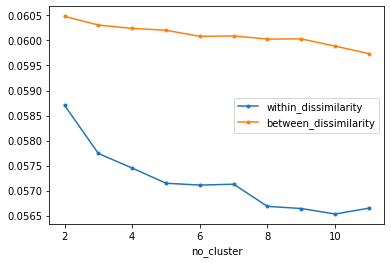

In [12]:
all_wk_within = {}
all_wk_between = {}

for n in range(10):
    n_medoids = n+2
    init_medoids = list(np.arange(n_medoids))
    init_medoids = [(x+1)*220 for x in init_medoids]
    
    kmedoids_instance = kmedoids(matrix2, init_medoids, data_type='distance_matrix')
    kmedoids_instance.process()
    
    clusters = kmedoids_instance.get_clusters()
    medoids = kmedoids_instance.get_medoids()
    
    wk = within_dissimilarity_kmedoids(distance, clusters)
    wk_1 = between_dissimilarity_kmedoids(distance, clusters)
    all_wk_within[n+2] = wk
    all_wk_between[n+2] = wk_1
    
            
wk_df = pd.DataFrame()
wk_df['no_cluster'] = all_wk_within.keys()
wk_df['within_dissimilarity'] = all_wk_within.values()
wk_df['between_dissimilarity'] = all_wk_between.values()

wk_df.plot(x='no_cluster', y=['within_dissimilarity','between_dissimilarity'], style='.-')
#plt.ylim((0.035, 0.065))
plt.show()

#### Comparison between the "complete" and the "average" linkage method

Text(0.5, 1.0, 'average')

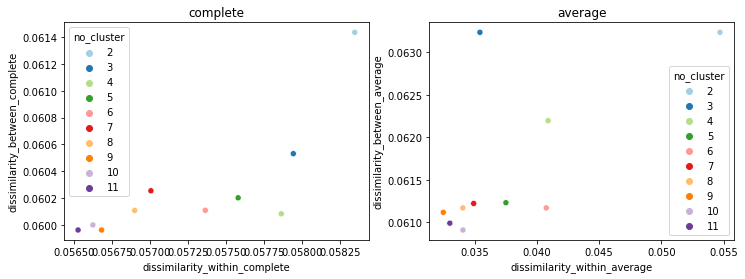

In [105]:
all_wk_within1 = {}
all_wk_between1 = {}
all_wk_within2 = {}
all_wk_between2 = {}


for i in range(10):
    clustering = AgglomerativeClustering(n_clusters=i+2, affinity='precomputed', linkage='complete').fit(distance)
    labels = clustering.labels_
    wk1 = within_dissimilarity(distance, clustering)
    wk_between1 = between_dissimilarity(distance, clustering)
    all_wk_within1[i+2] = wk1
    all_wk_between1[i+2] = wk_between1
    
for i in range(10):
    clustering = AgglomerativeClustering(n_clusters=i+2, affinity='precomputed', linkage='average').fit(distance)
    labels = clustering.labels_
    wk2 = within_dissimilarity(distance, clustering)
    wk_between2 = between_dissimilarity(distance, clustering)
    all_wk_within2[i+2] = wk2
    all_wk_between2[i+2] = wk_between2

wk_df = pd.DataFrame()
wk_df['no_cluster'] = all_wk_complete.keys()
wk_df['dissimilarity_within_complete'] = all_wk_within1.values()
wk_df['dissimilarity_between_complete'] = all_wk_between1.values()
wk_df['dissimilarity_within_average'] = all_wk_within2.values()
wk_df['dissimilarity_between_average'] = all_wk_between2.values()

plt.figure(figsize=(12, 4))
#sns.palplot(sns.color_palette("hls",8))
plt.subplot(121)
sns.scatterplot(x='dissimilarity_within_complete', y='dissimilarity_between_complete', hue='no_cluster', data=wk_df, palette=sns.color_palette("Paired", 10) )
plt.title('complete')
plt.subplot(122)
sns.scatterplot(x='dissimilarity_within_average', y='dissimilarity_between_average', hue='no_cluster', data=wk_df, palette=sns.color_palette("Paired", 10))
plt.title('average')


The points at the left upper are the mostly wanted, as they have low within similarity and high between dissimilarity

#### Check the distributions of maps

In [22]:
clustering = AgglomerativeClustering(n_clusters=3,affinity='precomputed', linkage='complete').fit(distance)

wk = within_dissimilarity(distance, clustering)
wk_between = between_dissimilarity(distance, clustering)

In [23]:
np.unique(clustering.labels_, return_counts=True)

(array([0, 1, 2], dtype=int64), array([1029,  297,  674], dtype=int64))

In [94]:
wk

0.05794191707034537

In [95]:
wk_between

0.06053136775667478

In [9]:
clustering = AgglomerativeClustering(n_clusters=3, affinity='precomputed', linkage='average').fit(distance)
wk = within_dissimilarity(distance, clustering)
wk_between = between_dissimilarity(distance, clustering)

In [10]:
np.unique(clustering.labels_, return_counts=True)

(array([0, 1, 2], dtype=int64), array([1994,    5,    1], dtype=int64))

In [26]:
wk

0.03543079347022159

In [27]:
wk_between

0.06323736422412574

In [144]:
cluster2 = kappa_df[clustering.labels_==1] 
cluster3 = kappa_df[clustering.labels_==2]

In [145]:
cluster2

,0,1,2,3,4,5,6,7,8,9,...,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999
178,0.939972,0.937019,0.940916,0.932683,0.941200,0.933680,0.936766,0.934860,0.938673,0.937657,...,0.937891,0.941104,0.937814,0.940292,0.931037,0.933427,0.939147,0.939204,0.938338,0.936547
1195,0.942067,0.940078,0.939501,0.935868,0.941465,0.936019,0.938133,0.937469,0.937696,0.936486,...,0.937205,0.939148,0.939653,0.940855,0.934791,0.935384,0.938884,0.940446,0.940995,0.936374
1366,0.942058,0.939133,0.937016,0.930462,0.944341,0.932694,0.934760,0.930822,0.940392,0.937926,...,0.936530,0.937600,0.941330,0.938723,0.929156,0.932891,0.936892,0.942719,0.940806,0.930885
1467,0.940688,0.940225,0.936929,0.934093,0.941757,0.935313,0.935832,0.933011,0.943079,0.934379,...,0.934924,0.937735,0.940327,0.939469,0.929278,0.931848,0.937048,0.941516,0.941225,0.934995
1649,0.939757,0.939793,0.937032,0.935063,0.941242,0.936344,0.937717,0.937427,0.937987,0.936888,...,0.939313,0.936762,0.939049,0.938316,0.934853,0.937825,0.938357,0.940217,0.939080,0.933405


In [146]:
cluster3

,0,1,2,3,4,5,6,7,8,9,...,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999
1737,0.940826,0.940301,0.939141,0.937928,0.940085,0.936262,0.933265,0.935091,0.942239,0.933934,...,0.927925,0.939378,0.937205,0.938109,0.933286,0.930918,0.933766,0.941425,0.942133,0.935112


Although the similarity within the cluster and the dissimilarity between the clusters are good, the distribution of the number of the maps are skewed

- Remove outlier and cluster again

In [11]:
distance_new = distance[clustering.labels_==0].T[clustering.labels_==0] 

clustering_new = AgglomerativeClustering(n_clusters=3, affinity='precomputed', linkage='average').fit(distance_new)
wk_new = within_dissimilarity(distance_new, clustering_new)
wk_between_new = between_dissimilarity(distance_new, clustering_new)

In [12]:
np.unique(clustering_new.labels_, return_counts=True)

(array([0, 1, 2], dtype=int64), array([1564,  428,    2], dtype=int64))

In [92]:
wk_new

0.04702577584892034

In [93]:
wk_between_new

0.06120843449552171

In [149]:
cluster3 = distance_new[clustering_new.labels_==2]

In [150]:
cluster3

,0,1,2,3,4,5,6,7,8,9,...,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999
577,0.065849,0.064189,0.060708,0.057017,0.068720,0.061569,0.060848,0.056928,0.067279,0.058876,...,0.06673,0.061200,0.068915,0.066451,0.059273,0.061871,0.061207,0.067379,0.066255,0.056566
1584,0.057388,0.056845,0.060800,0.064122,0.056638,0.061418,0.058138,0.063325,0.059783,0.062713,...,0.05983,0.062763,0.053580,0.059669,0.064838,0.058273,0.058476,0.058052,0.058231,0.065627


- Remove outlier again and cluster again

In [13]:
distance_new1 = distance_new[clustering_new.labels_!=2].T[clustering_new.labels_!=2] 

clustering_new1 = AgglomerativeClustering(n_clusters=3, affinity='precomputed', linkage='average').fit(distance_new1)
wk_new1 = within_dissimilarity(distance_new1, clustering_new1)
wk_between_new1 = between_dissimilarity(distance_new1, clustering_new1)

In [41]:
np.unique(clustering_new1.labels_, return_counts=True)

(array([0, 1, 2], dtype=int64), array([962, 428, 602], dtype=int64))

In [42]:
wk_new1

0.058017640297257485

In [43]:
wk_between_new1

0.060469189408127955

The within similarity is improved, but the between dissimilarity is lowered compared to the "complete" method, so check the "average" method for the cleaned dataset and compare with the "complete" method.

In [135]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

<AxesSubplot:xlabel='no_cluster'>

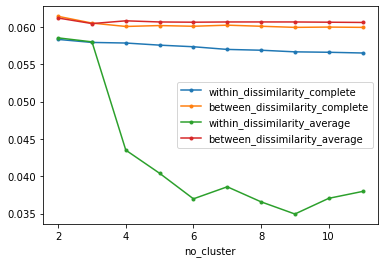

In [46]:
all_within_dissimilarity1 = {}
all_between_dissimilarity1 = {}
all_within_dissimilarity2 = {}
all_between_dissimilarity2 = {}


for i in range(10):   
    clustering_new1 = AgglomerativeClustering(n_clusters=i+2, affinity='precomputed', linkage='average').fit(distance_new1)
    labels = clustering_new1.labels_
    wk = within_dissimilarity(distance_new1, clustering_new1)
    wk2 = between_dissimilarity(distance_new1, clustering_new1)
    all_within_dissimilarity1[i+2] = wk
    all_between_dissimilarity1[i+2] = wk2

for i in range(10):   
    clustering_new2 = AgglomerativeClustering(n_clusters=i+2, affinity='precomputed', linkage='complete').fit(distance)
    labels = clustering_new2.labels_
    wk1 = within_dissimilarity(distance, clustering_new2)
    wk21 = between_dissimilarity(distance, clustering_new2)
    all_within_dissimilarity2[i+2] = wk1
    all_between_dissimilarity2[i+2] = wk21


wk_df = pd.DataFrame()
wk_df['no_cluster'] = all_within_dissimilarity1.keys()
wk_df['within_dissimilarity_complete'] = all_within_dissimilarity2.values()
wk_df['between_dissimilarity_complete'] = all_between_dissimilarity2.values()
wk_df['within_dissimilarity_average'] = all_within_dissimilarity1.values()
wk_df['between_dissimilarity_average'] = all_between_dissimilarity1.values()


  
wk_df.plot(x='no_cluster', y=['within_dissimilarity_complete', 'between_dissimilarity_complete',
                              'within_dissimilarity_average', 'between_dissimilarity_average' ], style='.-')

The average linkage methods (aftering removing the outliers) perfoms worse than the complete method

#### Prepare the datesets

In [44]:
from ema_workbench.util.utilities import load_results

results_1= load_results('exp_1400_new.tar.gz')
experiments_1, outcomes_1 = results_1

results_2= load_results('exp_new_600.tar.gz')
experiments_2, outcomes_2 = results_2

experiments = pd.concat([experiments_1,experiments_2])

ooi = outcomes_1['lu_map'].astype(int)

ooi = np.vstack((ooi, outcomes_2['lu_map'].astype(int)))

[MainProcess/INFO] results loaded succesfully from C:\Users\teres\Documents\MasterThesis\Final_Run_EMA\Model_2015_2050\exp_1400_new.tar.gz
[MainProcess/INFO] results loaded succesfully from C:\Users\teres\Documents\MasterThesis\Final_Run_EMA\Model_2015_2050\exp_new_600.tar.gz


### Analysis: Representative map of each cluster

#### Distribution 1

- Cluster 1

In [45]:
import numpy as np
from scipy.spatial.distance import pdist, squareform

In [54]:
clustering = AgglomerativeClustering(n_clusters=3,affinity='precomputed', linkage='complete').fit(distance)

In [55]:
np.unique(clustering.labels_, return_counts=True)

(array([0, 1, 2], dtype=int64), array([1029,  297,  674], dtype=int64))

In [47]:
ooi_0 = kappa_df[clustering.labels_==0] 
ooi_01 = ooi_0.T
cluster1 = ooi_01[clustering.labels_==0] 
cluster1 = cluster1.T # Kappa values for each pair comparison
arr1 = cluster1.to_numpy()
# To calculate the kappa index for each map 
cluster1['sum'] = cluster1.sum(axis=1)

In [48]:
cluster1[cluster1['sum']==cluster1['sum'].min()]

,2,3,5,6,7,9,11,12,13,16,...,1978,1981,1987,1988,1989,1991,1994,1996,1999,sum
1349,0.933814,0.935077,0.937753,0.938287,0.938261,0.939753,0.93739,0.936699,0.933885,0.93675,...,0.935667,0.932916,0.937109,0.932526,0.943642,0.934162,0.939481,0.9379,0.93643,964.193867


In [49]:
cluster1[cluster1['sum']==cluster1['sum'].max()]

,2,3,5,6,7,9,11,12,13,16,...,1978,1981,1987,1988,1989,1991,1994,1996,1999,sum
906,0.944486,0.947179,0.946484,0.941849,0.946984,0.943114,0.943858,0.943966,0.941832,0.94437,...,0.940804,0.942229,0.946561,0.945078,0.945442,0.944855,0.944229,0.941622,0.947976,972.153031


- Cluster 2

In [50]:
ooi_1 = kappa_df[clustering.labels_==1]
ooi_11 = ooi_1.T
cluster2 = ooi_11[clustering.labels_==1]
cluster2 = cluster2.T
cluster2['sum'] = cluster2.sum(axis=1)

In [51]:
cluster2[cluster2['sum']==cluster2['sum'].min()]

,14,15,26,32,49,51,53,60,65,83,...,1941,1943,1946,1947,1949,1954,1957,1984,1995,sum
1382,0.941369,0.943658,0.942938,0.938157,0.933594,0.936782,0.933828,0.935804,0.937902,0.940545,...,0.935104,0.942507,0.939566,0.938608,0.945456,0.930478,0.943727,0.936395,0.934526,278.646972


In [52]:
cluster2[cluster2['sum']==cluster2['sum'].max()]

,14,15,26,32,49,51,53,60,65,83,...,1941,1943,1946,1947,1949,1954,1957,1984,1995,sum
335,0.942133,0.946302,0.941191,0.945928,0.944937,0.945822,0.94805,0.944248,0.947136,0.945825,...,0.947183,0.943729,0.946539,0.948945,0.939388,0.945928,0.942515,0.95,0.946409,280.707316


- Cluster 3

In [56]:
ooi_2 = kappa_df[clustering.labels_==2]
ooi_21 = ooi_2.T
cluster3 = ooi_21[clustering.labels_==2]
cluster3 = cluster3.T
cluster3['sum'] = cluster3.sum(axis=1)

In [57]:
cluster3[cluster3['sum']==cluster3['sum'].min()]

,0,1,4,8,10,17,19,20,21,22,...,1982,1983,1985,1986,1990,1992,1993,1997,1998,sum
531,0.935413,0.936261,0.938139,0.934413,0.93207,0.939563,0.939366,0.934728,0.93904,0.938695,...,0.939889,0.938008,0.934543,0.938604,0.944888,0.940879,0.939424,0.93529,0.935846,631.429227


In [58]:
cluster3[cluster3['sum']==cluster3['sum'].max()]

,0,1,4,8,10,17,19,20,21,22,...,1982,1983,1985,1986,1990,1992,1993,1997,1998,sum
833,0.94699,0.948289,0.946276,0.944047,0.943273,0.94661,0.944091,0.944453,0.947225,0.945854,...,0.944183,0.943259,0.946529,0.948378,0.939409,0.946935,0.946055,0.945778,0.94727,636.945876


#### Distribution 2

In [14]:
clustering = AgglomerativeClustering(n_clusters=3,affinity='precomputed', linkage='average').fit(distance_new1)

In [15]:
np.unique(clustering.labels_, return_counts=True)

(array([0, 1, 2], dtype=int64), array([962, 428, 602], dtype=int64))

In [57]:
within_dissimilarity(distance_new1, clustering)

0.036991334704445926

In [59]:
between_dissimilarity(distance_new1, clustering)

0.060651663699385766

In [18]:
ooi_0 = distance_new1[clustering.labels_==0] 
ooi_01 = ooi_0.T
cluster1 = ooi_01[clustering.labels_==0] 
cluster1 = cluster1.T # Kappa values for each pair comparison
arr1 = cluster1.to_numpy()
# To calculate the kappa index for each map 
cluster1['sum'] = cluster1.sum(axis=1)

In [62]:
cluster1[cluster1['sum']==cluster1['sum'].min()]

,2,3,5,6,7,10,11,12,13,16,...,1981,1985,1987,1988,1989,1991,1994,1996,1999,sum
906,0.055514,0.052821,0.053516,0.058151,0.053016,0.057809,0.056142,0.056034,0.058168,0.05563,...,0.057771,0.054858,0.053439,0.054922,0.054558,0.055145,0.055771,0.058378,0.052024,52.731768


In [63]:
cluster1[cluster1['sum']==cluster1['sum'].max()]

,2,3,5,6,7,10,11,12,13,16,...,1981,1985,1987,1988,1989,1991,1994,1996,1999,sum
1726,0.063234,0.065709,0.060397,0.060655,0.062346,0.061124,0.059506,0.062235,0.063384,0.064182,...,0.062016,0.059526,0.068054,0.062475,0.064075,0.06007,0.065683,0.058752,0.06729,60.466664


In [19]:
random.choice(cluster1.index)

992

- Cluster 2

In [71]:
ooi_1 = distance_new1[clustering.labels_==1]
ooi_11 = ooi_1.T
cluster2 = ooi_11[clustering.labels_==1]
cluster2 = cluster2.T
cluster2['sum'] = cluster2.sum(axis=1)

In [16]:
import random

In [79]:
random.choice(cluster2.index)

1846

In [74]:
cluster2[cluster2['sum']==cluster2['sum'].min()]

,15,18,19,20,26,32,34,49,50,51,...,1943,1946,1947,1949,1954,1975,1984,1990,1995,sum
335,0.053698,0.057985,0.055515,0.058878,0.058809,0.054072,0.059953,0.055063,0.056543,0.054178,...,0.056271,0.053461,0.051055,0.060612,0.054072,0.056669,0.05,0.058317,0.053591,23.705511


In [75]:
cluster2[cluster2['sum']==cluster2['sum'].max()]

,15,18,19,20,26,32,34,49,50,51,...,1943,1946,1947,1949,1954,1975,1984,1990,1995,sum
1382,0.056342,0.071653,0.061281,0.061015,0.057062,0.061843,0.067197,0.066406,0.059471,0.063218,...,0.057493,0.060434,0.061392,0.054544,0.069522,0.056101,0.063605,0.061516,0.065474,26.626879


- Cluster 3

In [76]:
ooi_2 = distance_new1[clustering.labels_==2]
ooi_21 = ooi_2.T
cluster3 = ooi_21[clustering.labels_==2]
cluster3 = cluster3.T
cluster3['sum'] = cluster3.sum(axis=1)

In [77]:
cluster3[cluster3['sum']==cluster3['sum'].min()]

,0,1,4,8,9,14,17,22,27,29,...,1979,1980,1982,1983,1986,1992,1993,1997,1998,sum
833,0.05301,0.051711,0.053724,0.055953,0.05742,0.058761,0.05339,0.054146,0.052119,0.05788,...,0.055423,0.058933,0.055817,0.056741,0.051622,0.053065,0.053945,0.054222,0.05273,33.140872


In [78]:
cluster3[cluster3['sum']==cluster3['sum'].max()]

,0,1,4,8,9,14,17,22,27,29,...,1979,1980,1982,1983,1986,1992,1993,1997,1998,sum
1110,0.06503,0.060762,0.065473,0.067119,0.054533,0.065336,0.061456,0.065348,0.064069,0.056832,...,0.064197,0.058384,0.062059,0.064911,0.062858,0.064371,0.062885,0.066235,0.06527,37.979951


In [80]:
random.choice(cluster3.index)

1646

#### Distribution 3

In [81]:
model = MDS(n_components=4, dissimilarity='precomputed', random_state=1, metric=False)
out = model.fit_transform(distance)
clustering = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='average').fit(out)

In [12]:
np.unique(clustering.labels_, return_counts=True)

(array([0, 1, 2, 3], dtype=int64), array([697, 423, 879,   1], dtype=int64))

In [82]:
ooi_0 = distance[clustering.labels_==0] 
ooi_01 = ooi_0.T
cluster1 = ooi_01[clustering.labels_==0] 
cluster1 = cluster1.T # Kappa values for each pair comparison
arr1 = cluster1.to_numpy()
# To calculate the kappa index for each map 
cluster1['sum'] = cluster1.sum(axis=1)

In [83]:
cluster1[cluster1['sum']==cluster1['sum'].min()]

,0,3,5,7,15,20,28,29,32,35,...,1978,1980,1984,1986,1991,1992,1993,1996,1998,sum
909,0.055576,0.053549,0.055749,0.056088,0.057504,0.055817,0.053907,0.058996,0.057955,0.054518,...,0.05579,0.057566,0.053446,0.052162,0.054666,0.053176,0.054319,0.054659,0.055642,39.108089


In [84]:
cluster1[cluster1['sum']==cluster1['sum'].max()]

,0,3,5,7,15,20,28,29,32,35,...,1978,1980,1984,1986,1991,1992,1993,1996,1998,sum
208,0.061201,0.072916,0.066709,0.069934,0.058795,0.060645,0.07226,0.061431,0.061618,0.07041,...,0.061526,0.061062,0.064261,0.062712,0.066236,0.058878,0.061769,0.065466,0.064091,45.729865


In [85]:
ooi_1 = distance[clustering.labels_==1]
ooi_11 = ooi_1.T
cluster2 = ooi_11[clustering.labels_==1]
cluster2 = cluster2.T
cluster2['sum'] = cluster2.sum(axis=1)

In [86]:
cluster2[cluster2['sum']==cluster2['sum'].max()]

,1,10,16,24,25,26,30,33,34,37,...,1945,1956,1958,1960,1961,1969,1973,1979,1994,sum
1171,0.063181,0.064201,0.067266,0.069158,0.066547,0.055447,0.065427,0.06513,0.063382,0.061327,...,0.066532,0.06985,0.062052,0.063139,0.064097,0.067882,0.070506,0.057951,0.067463,27.199671


In [87]:
cluster2[cluster2['sum']==cluster2['sum'].min()]

,1,10,16,24,25,26,30,33,34,37,...,1945,1956,1958,1960,1961,1969,1973,1979,1994,sum
1414,0.052829,0.056741,0.056969,0.058112,0.055841,0.061542,0.053743,0.058753,0.055521,0.061019,...,0.05473,0.059401,0.055778,0.050852,0.055292,0.05366,0.055333,0.056887,0.056264,23.75


In [89]:
ooi_2 = distance[clustering.labels_==2]
ooi_21 = ooi_2.T
cluster3 = ooi_21[clustering.labels_==2]
cluster3 = cluster3.T
cluster3['sum'] = cluster3.sum(axis=1)

In [91]:
cluster3[cluster3['sum']==cluster3['sum'].min()]

,2,4,6,8,9,11,12,13,14,17,...,1982,1983,1985,1987,1988,1989,1990,1997,1999,sum
1131,0.055835,0.056209,0.053873,0.059465,0.056818,0.054673,0.054024,0.057595,0.056529,0.054189,...,0.056471,0.056681,0.056171,0.058699,0.057019,0.053582,0.058173,0.055805,0.05684,49.19958


In [93]:
cluster3[cluster3['sum']==cluster3['sum'].max()]

,2,4,6,8,9,11,12,13,14,17,...,1982,1983,1985,1987,1988,1989,1990,1997,1999,sum
1382,0.066455,0.059317,0.066353,0.064223,0.067744,0.069635,0.06631,0.070747,0.058631,0.065247,...,0.061681,0.061085,0.064252,0.075826,0.066238,0.068677,0.061516,0.06286,0.073952,57.980701


In [94]:
random.choice(cluster3.index)

938

In [95]:
ooi_3 = distance[clustering.labels_==3]
ooi_31 = ooi_3.T
cluster4 = ooi_31[clustering.labels_==3]
cluster4 = cluster4.T

In [96]:
cluster4

,1995,sum
1995,0.0,0.0


#### Distribution 4

MDS = 6 is not chosen mainly becasue the resulted clusters are too similar to those of MDS = 4

In [117]:
model = MDS(n_components=9, dissimilarity='precomputed', random_state=1, metric=False)
out = model.fit_transform(distance)
clustering = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='average').fit(out)

In [118]:
np.unique(clustering.labels_, return_counts=True)

(array([0, 1, 2, 3], dtype=int64), array([870, 619, 510,   1], dtype=int64))

In [133]:
ooi_0 = distance[clustering.labels_==0] 
ooi_01 = ooi_0.T
cluster1 = ooi_01[clustering.labels_==0] 
cluster1 = cluster1.T # Kappa values for each pair comparison
arr1 = cluster1.to_numpy()
# To calculate the kappa index for each map 
cluster1['sum'] = cluster1.sum(axis=1)

In [134]:
cluster1[cluster1['sum']==cluster1['sum'].min()]

,1,2,4,6,7,8,9,10,11,12,...,1966,1967,1969,1971,1976,1981,1991,1992,1993,sum
1338,0.052996,0.055731,0.055834,0.053914,0.054211,0.059319,0.05634,0.055418,0.053126,0.055606,...,0.057346,0.057233,0.054057,0.058393,0.059438,0.054922,0.053683,0.055128,0.053822,48.931033


In [135]:
cluster1[cluster1['sum']==cluster1['sum'].max()]

,1,2,4,6,7,8,9,10,11,12,...,1966,1967,1969,1971,1976,1981,1991,1992,1993,sum
1382,0.061785,0.066455,0.059317,0.066353,0.070478,0.064223,0.067744,0.068334,0.069635,0.06631,...,0.070395,0.068651,0.068145,0.068771,0.066,0.066742,0.066988,0.056557,0.059573,57.264512


In [122]:
ooi_1 = distance[clustering.labels_==1]
ooi_11 = ooi_1.T
cluster2 = ooi_11[clustering.labels_==1]
cluster2 = cluster2.T
cluster2['sum'] = cluster2.sum(axis=1)

In [123]:
cluster2[cluster2['sum']==cluster2['sum'].max()]

,0,3,5,13,16,18,19,22,23,26,...,1970,1972,1980,1982,1983,1987,1994,1998,1999,sum
785,0.068309,0.067308,0.062739,0.065816,0.06479,0.064675,0.059915,0.064104,0.067452,0.062814,...,0.059596,0.061777,0.058319,0.065837,0.067475,0.071013,0.064091,0.068715,0.068564,39.875072


In [124]:
cluster2[cluster2['sum']==cluster2['sum'].min()]

,0,3,5,13,16,18,19,22,23,26,...,1970,1972,1980,1982,1983,1987,1994,1998,1999,sum
909,0.055576,0.053549,0.055749,0.058362,0.058223,0.056326,0.054847,0.055151,0.058306,0.060097,...,0.055041,0.056959,0.057566,0.057287,0.058308,0.057905,0.055909,0.055642,0.056594,34.730739


In [136]:
random.choice(cluster2.index)

1875

In [137]:
ooi_2 = distance[clustering.labels_==2]
ooi_21 = ooi_2.T
cluster3 = ooi_21[clustering.labels_==2]
cluster3 = cluster3.T
cluster3['sum'] = cluster3.sum(axis=1)

In [138]:
cluster3[cluster3['sum']==cluster3['sum'].min()]

,14,17,21,27,35,38,39,40,51,53,...,1984,1985,1986,1988,1989,1990,1995,1996,1997,sum
1131,0.056529,0.054189,0.050827,0.052482,0.055062,0.054738,0.054987,0.052471,0.053922,0.053547,...,0.052818,0.056171,0.053573,0.057019,0.053582,0.058173,0.055687,0.055487,0.055805,28.479815


In [139]:
cluster3[cluster3['sum']==cluster3['sum'].max()]

,14,17,21,27,35,38,39,40,51,53,...,1984,1985,1986,1988,1989,1990,1995,1996,1997,sum
1949,0.055501,0.064295,0.061682,0.065125,0.068129,0.066938,0.071384,0.063548,0.062682,0.064582,...,0.064214,0.064764,0.062076,0.067318,0.068078,0.061223,0.064821,0.064164,0.061207,33.550786


In [140]:
random.choice(cluster3.index)

1951

In [130]:
ooi_3 = distance[clustering.labels_==3]

In [131]:
ooi_3

,0,1,2,3,4,5,6,7,8,9,...,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999
1964,0.060523,0.056956,0.060335,0.056519,0.06227,0.058116,0.059546,0.053828,0.062133,0.061832,...,0.063984,0.058336,0.062403,0.059009,0.056881,0.058536,0.059121,0.05932,0.059889,0.060043


#### Distribution 5

In [28]:
clustering = AgglomerativeClustering(n_clusters=10, affinity='precomputed', linkage='average').fit(distance)

In [29]:
np.unique(clustering.labels_, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64),
 array([428,   5, 602,   6, 951,   1,   1,   2,   2,   2], dtype=int64))

In [38]:
ooi_0 = distance[clustering.labels_==0] 
ooi_01 = ooi_0.T
cluster1 = ooi_01[clustering.labels_==0] 
cluster1 = cluster1.T # Kappa values for each pair comparison
arr1 = cluster1.to_numpy()
# To calculate the kappa index for each map 
cluster1['sum'] = cluster1.min(axis=1)

In [39]:
cluster1[cluster1['sum']==cluster1['sum'].min()]

,15,18,19,20,26,32,34,49,50,51,...,1943,1946,1947,1949,1954,1975,1984,1990,1995,sum
611,0.054441,0.058534,0.054773,0.054224,0.059455,0.057937,0.056416,0.059386,0.058063,0.053804,...,0.056092,0.051568,0.054142,0.061182,0.057590,0.056378,0.052270,0.061564,0.054930,-2.220446e-16
1288,0.055217,0.058713,0.054689,0.054736,0.059794,0.058088,0.058503,0.057075,0.057472,0.054628,...,0.055168,0.050360,0.052241,0.060772,0.057617,0.056530,0.054308,0.060974,0.056448,-2.220446e-16


In [129]:
ooi_3

,0,1,2,3,4,5,6,7,8,9,...,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999
1964,0.060523,0.056956,0.060335,0.056519,0.06227,0.058116,0.059546,0.053828,0.062133,0.061832,...,0.063984,0.058336,0.062403,0.059009,0.056881,0.058536,0.059121,0.05932,0.059889,0.060043


### Analysis - Scenario Discovery

In [28]:
from ema_workbench import ema_logging
from ema_workbench.analysis import prim

ema_logging.log_to_stderr(ema_logging.INFO)

<Logger EMA (DEBUG)>

In [20]:
clustering = AgglomerativeClustering(n_clusters=3,affinity='precomputed', linkage='complete').fit(distance)

In [49]:
clustering = AgglomerativeClustering(n_clusters=6,affinity='precomputed', linkage='average').fit(distance)

In [51]:
x = experiments
y = clustering.labels_== 0

prim_obj = prim.Prim(x,y, threshold=0.2, peel_alpha=0.1)
box1 = prim_obj.find_box()
box1.peeling_trajectory

[MainProcess/INFO] policy dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] 2000 points remaining, containing 962 cases of interest
[MainProcess/INFO] mean: 1.0, mass: 0.097, coverage: 0.20166320166320167, density: 1.0 restricted_dimensions: 6


,coverage,density,id,mass,mean,res_dim
0,1.000000,0.481000,0,1.0000,0.481000,0
1,0.972973,0.520000,1,0.9000,0.520000,1
2,0.944906,0.561111,2,0.8100,0.561111,1
3,0.912682,0.602195,3,0.7290,0.602195,1
4,0.872141,0.639482,4,0.6560,0.639482,2
5,0.828482,0.675424,5,0.5900,0.675424,2
6,0.781705,0.708098,6,0.5310,0.708098,3
7,0.739085,0.744503,7,0.4775,0.744503,3
8,0.695426,0.778813,8,0.4295,0.778813,3
9,0.650728,0.809832,9,0.3865,0.809832,4


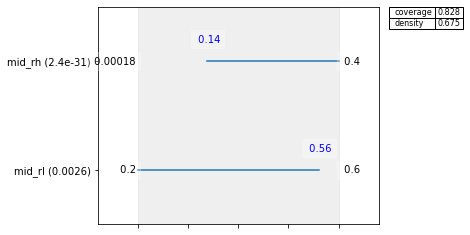

In [55]:
box1.inspect(5, style='graph')
#plt.savefig('cluster_1_sd_70%.jpeg',bbox_inches='tight', dpi=200)
plt.show()

In [35]:
x = experiments
y = clustering.labels_== 1

prim_obj = prim.Prim(x,y, threshold=0.2, peel_alpha=0.1)
box1 = prim_obj.find_box()
box1.peeling_trajectory

[MainProcess/INFO] policy dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] 2000 points remaining, containing 428 cases of interest
[MainProcess/INFO] mean: 0.9841269841269841, mass: 0.063, coverage: 0.2897196261682243, density: 0.9841269841269841 restricted_dimensions: 4


,coverage,density,id,mass,mean,res_dim
0,1.000000,0.214000,0,1.0000,0.214000,0
1,1.000000,0.237778,1,0.9000,0.237778,1
2,0.997664,0.263580,2,0.8100,0.263580,1
3,0.995327,0.292181,3,0.7290,0.292181,1
4,0.990654,0.323171,4,0.6560,0.323171,2
5,0.978972,0.355085,5,0.5900,0.355085,2
6,0.964953,0.388889,6,0.5310,0.388889,2
7,0.960280,0.430366,7,0.4775,0.430366,2
8,0.941589,0.469150,8,0.4295,0.469150,2
9,0.920561,0.509702,9,0.3865,0.509702,2


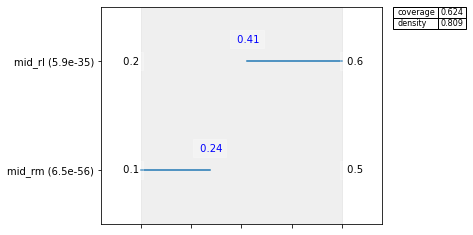

In [36]:
box1.inspect(17, style='graph')
plt.savefig('cluster2_sd_70%.jpeg',bbox_inches='tight', dpi=200)
plt.show()

In [37]:
x = experiments
y = clustering.labels_== 2

prim_obj = prim.Prim(x,y, threshold=0.2, peel_alpha=0.1)
box1 = prim_obj.find_box()
box1.peeling_trajectory

[MainProcess/INFO] policy dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] 2000 points remaining, containing 602 cases of interest
[MainProcess/INFO] mean: 1.0, mass: 0.0565, coverage: 0.1877076411960133, density: 1.0 restricted_dimensions: 7


,coverage,density,id,mass,mean,res_dim
0,1.000000,0.301000,0,1.0000,0.301000,0
1,0.986711,0.330000,1,0.9000,0.330000,1
2,0.976744,0.362963,2,0.8100,0.362963,1
3,0.968439,0.399863,3,0.7290,0.399863,1
4,0.950166,0.435976,4,0.6560,0.435976,1
5,0.936877,0.477966,5,0.5900,0.477966,1
6,0.913621,0.517891,6,0.5310,0.517891,2
7,0.890365,0.561257,7,0.4775,0.561257,2
8,0.853821,0.598370,8,0.4295,0.598370,2
9,0.822259,0.640362,9,0.3865,0.640362,2


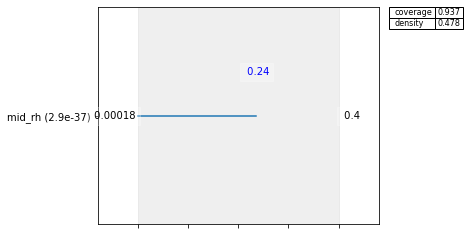

In [42]:
box1.inspect(5, style='graph')
#plt.savefig('cluster_3_sd_70%.jpeg',bbox_inches='tight', dpi=200)
plt.show()

### Not read from here

In [23]:
def calc_probability_map(maps, lu):
    num_maps = maps.shape[0]
    print(num_maps)
    shape = maps.shape
    maps_r = np.transpose(maps)
    
    prob_map = np.zeros((shape[1], shape[2]))
    
    for i in range(shape[1]):
        for j in range(shape[2]):
            unique_counts = np.unique(maps_r[:][j][i], return_counts=True)
            unique_counts = dict(zip(unique_counts[0], unique_counts[1]))
            try:
                prob_map[i, j] = unique_counts[lu]
            except:
                pass
    
    return prob_map

In [25]:
triple_prob_map_0 = calc_probability_map(ooi_0, 3)
triple_prob_map_1 = calc_probability_map(ooi_1, 3)
triple_prob_map_2 = calc_probability_map(ooi_2, 3)

1029
297
674


In [38]:
ooi_clustered = [triple_prob_map_0, triple_prob_map_1, triple_prob_map_2]

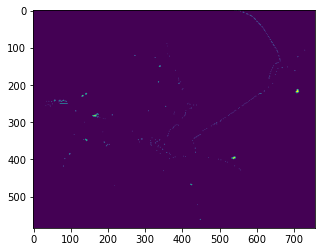

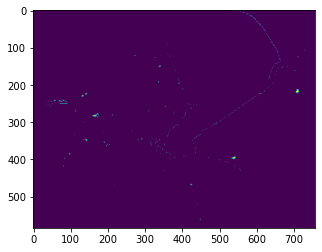

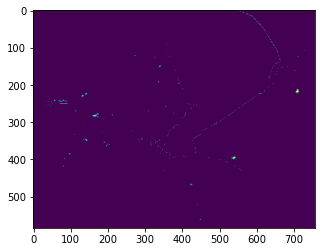

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.imshow(triple_prob_map_0)
plt.show()
plt.imshow(triple_prob_map_1)
plt.show()
plt.imshow(triple_prob_map_2)
plt.show()

In [41]:
from scipy import stats

ooi_0_mode = stats.mode(ooi_0).mode[0]
ooi_1_mode = stats.mode(ooi_1).mode[0]
ooi_2_mode = stats.mode(ooi_2).mode[0]

In [43]:
from PIL import Image
mask = np.array(Image.open('regionboundary_extents_of_landuse.tif'))[:-1,:]

In [44]:
ooi_0_mode = np.where(mask==1, ooi_0_mode, 0)
ooi_1_mode = np.where(mask==1, ooi_1_mode, 0)
ooi_2_mode = np.where(mask==1, ooi_2_mode, 0)

In [46]:
import Kappa_1 as kappa

In [47]:
try:
    ooi_clustered = [ooi_0_mode, ooi_1_mode, ooi_2_mode]
except:
    ooi_clustered = [ooi_0_mode, ooi_1_mode, ooi_2_mode]

import datetime
print(datetime.datetime.now())

kappa_clustered_df = kappa.kappa_ema_multiprocess(ooi_clustered, mask)
print(datetime.datetime.now())

2021-09-06 23:05:08.016116


TypeError: kappa_mod() missing 9 required positional arguments: 'row', 'column', 'luc', 'Po_array', 'Pe1_array', 'Pe2_array', 'Pe_array', 'Pmax_array', and 'arg_pairs'